# Ejercicios Parte II
## Li Yang, Patiy - 20191294
Los ejercicios 5, 6, 7, 8 y 9 de esta parte deben leer su data de links en Github y el código y los resultados deben ser publicados en páginas en Github. Este es un proyecto distinto y los ejercicios tienen que ser publicados en una página diferente.

## Ejercicio 5

1. Get a polygons map of the lowest administrative unit possible.    
2. Get a table of variables for those units. At least 3 numerical variables.
3. Preprocess both tables and get them ready for merging. 
4. Do the merging, making the changes needed so that you keep the most columns.

**5.1. Subdivisiones administrativas a nivel de prefecturas en China (ADM2)**

Fuente: [China - Subnational Administrative Boundaries](https://data.humdata.org/dataset/cod-ab-chn).

Notar que ADM1 es la subdivisión a nivel de provincia, mientras que ADM2, es aquella a nivel de prefectura. Se ha colocado el nombre de ADM1, junto con ADM2 (ADM1;ADM2), pues hay provincias distintas que contienen prefecturas del mismo nombre.

El GeoDataFrame del mapa de polígonos de las subdiviciones administrativas ADM2 fue procesado anteriormente en el Jupyter Notebook PreproEvaluación#4_2da-Parte_Mining_GeoDFs. Este se encuentra proyectado con un crs de 3415.

In [124]:
import geopandas as gpd

China3415_maps = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_2da-Parte_Mining_GeoDFs/raw/main/maps/China3415_map/China3415_GeoMap.gpkg"
China_ADM2 = gpd.read_file(China3415_maps,layer="PrefectureLevel_ADM2")
China_ADM2.head()

,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry
0,CN065,CN065100,XinjiangUygurAutonomousRegion;Karamay,"POLYGON ((-1970139.776 3501254.481, -1968482.7..."
1,CN065,CN065060,XinjiangUygurAutonomousRegion;ChangjiHuiAutono...,"POLYGON ((-1435866.505 3385323.591, -1441284.2..."
2,CN065,CN065130,XinjiangUygurAutonomousRegion;Shihezi,"POLYGON ((-1920371.401 3365547.617, -1922878.1..."
3,CN015,CN015120,InnerMongoliaAutonomousRegion;XilingolLeague,"POLYGON ((993809.799 3455055.691, 1001127.812 ..."
4,CN021,CN021020,LiaoningProvince;Benxi,"POLYGON ((1534098.705 2791209.973, 1528098.355..."


**5.2.,5.3. y 5.4. Preprocesamiento de tablas con variables numéricas y Merging**

No se logró conseguir una tabla con 3 variables numéricas, pero sí 3 tablas con 1 variable numérica cada una. Por tanto, se deberá realizar un *merge* de las 3 tablas. Las variables numéricas son las siguientes:

- Índice normalizado de diferencia de vegetación ( "normalized difference vegetation index" o NDVI), el cual es una medida para cuantificar la densidad de vegetación en un área dada. Fuente: [China: NDVI at Subnational Level](https://data.humdata.org/dataset/chn-ndvi-subnational)

- Indicadores SDG 7.1.1 ("Sustainable Development Goals") del porcentaje de la población con acceso a la electricidad. Fuente: [SDG Indicator 7.1.1: Access to Electricity, 2023 Release (2020 – 2022)](https://sedac.ciesin.columbia.edu/data/set/sdgi-7-1-1-access-electricity-2023)

- Indicadores SDG 9.1.1 ("Sustainable Development Goals") del índice de acceso rural, que alude al porcentaje de la población que vive al menos a 2 kilómetros de una carretera transitable. Fuente: [SDG Indicator 9.1.1: The Rural Access Index (RAI), 2023 Release (2015 – 2022)](https://sedac.ciesin.columbia.edu/data/set/sdgi-9-1-1-rai-2023)

Las tres tablas ya fueron procesadas de forma individual en el Jupyter Notebook PreproEvaluación#4_2da-Parte_Mining_GeoDFs:

`a) Tabla con los valores promedios de índices normalizados de la diferencia de vegetación (NDVI, por sus siglas en inglés) en subdivisiones administrativas a nivel de prefecturas (AMD2) en China: NDVI_China2023`

Nota: La tabla contiene 334 datos

In [125]:
import pandas as pd

NDVI_Link = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_2da-Parte_Mining_GeoDFs/raw/main/data/NDVI_China2023_prepro.csv"
NDVI_China2023 = pd.read_csv(NDVI_Link,index_col=0)
NDVI_China2023.head()

,ADM2_PCODE,NDVI_avg
0,CN053160,0.6006
1,CN053020,0.6633
2,CN053060,0.6767
3,CN054050,0.3202
4,CN053130,0.6666


`b) Tabla con indicadores del porcentaje de la población con acceso a la electricidad en subdivisiones administrativas a nivel de prefecturas (AMD2) en China: SDG711_ElectricityAccess_China2023`

Nota: La tabla contiene 344 datos

In [126]:
SDG711_Link = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_2da-Parte_Mining_GeoDFs/raw/main/data/SDG711_ElectricityAccess_China2023_prepro.csv"
SDG711_ElectricityAccess_China2023 = pd.read_csv(SDG711_Link,index_col=0)
SDG711_ElectricityAccess_China2023.head()

,SDG711_pct,ADM1_PROVINCE;ADM2_PREFECTURE
0,51.056611,Anhui;Anqing
1,70.505872,Anhui;Bengbu
2,57.124918,Anhui;Bozhou
3,65.594567,Anhui;Chaohu
4,50.803892,Anhui;Chizhou


`c) Tabla con indicadores porcentuales del índice de acceso rural en subdivisiones administrativas a nivel de prefecturas (AMD2) en China: SDG911_RuralAccess_China2023`

Nota: La tabla contiene 344 datos

In [127]:
SDG911_Link = "https://github.com/Ciencia-de-datos-espaciales-2023-2/Evaluacion4_2da-Parte_Mining_GeoDFs/raw/main/data/SDG911_RuralAccess_China2023_prepro.csv"
SDG911_RuralAccess_China2023 = pd.read_csv(SDG911_Link,index_col=0)
SDG911_RuralAccess_China2023.head()

,SDG911_pct,ADM1_PROVINCE;ADM2_PREFECTURE
0,84.749728,Anhui;Anqing
1,94.908604,Anhui;Bengbu
2,95.735585,Anhui;Bozhou
3,95.028170,Anhui;Chaohu
4,80.718768,Anhui;Chizhou


Como se observa, no es posible realizar un *merge* de las tres columnas, porque no todas comparten una en común. Por esto, se realizará lo siguiente:
1. *Merge* de SDG711_ElectricityAccess_China2023 y SDG911_RuralAccess_China2023, mediante la columna "ADM1_PROVINCE;ADM2_PREFECTURE".
2. *Merge* de NDVI_China2023 y SDG911_RuralAccess_China2023, mediante la columna "ADM2_PCODE".
3. *Fuzy Merge* de las tablas resultantes de 1 y 2, porque comparten la columna "ADM1_PROVINCE;ADM2_PREFECTURE", pero el formato de los nombres no es el mismo.

`d) *Merging* de SDG711_ElectricityAccess_China2023 y SDG911_RuralAccess_China2023 mediante la columna "ADM1_PROVINCE;ADM2_PREFECTURE"`

Nota: Ambas tablas contienen 344 filas y comparten las mismas filas correspondientes a subdivisiones ADM2. La tabla resultante del *merging* también contiene 344 filas, lo cual evidencia que no se ha repetido u omitido algún dato.

In [128]:
a = set(SDG711_ElectricityAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list()) 
b = set(SDG911_RuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
a-b, b-a

(set(), set())

In [129]:
ElectricityRuralAccess_China2023 = SDG711_ElectricityAccess_China2023.merge(
    SDG911_RuralAccess_China2023, on = "ADM1_PROVINCE;ADM2_PREFECTURE")

ElectricityRuralAccess_China2023

,SDG711_pct,ADM1_PROVINCE;ADM2_PREFECTURE,SDG911_pct
0,51.056611,Anhui;Anqing,84.749728
1,70.505872,Anhui;Bengbu,94.908604
2,57.124918,Anhui;Bozhou,95.735585
3,65.594567,Anhui;Chaohu,95.028170
4,50.803892,Anhui;Chizhou,80.718768
...,...,...,...
339,79.097747,Zhejiang;Quzhou,99.601174
340,94.671754,Zhejiang;Shaoxing,96.554436
341,95.714004,Zhejiang;Taizhou,94.300258
342,97.430320,Zhejiang;Wenzhou,92.875470


`e) Merging de NDVI_China2023 y China_ADM2 mediante la columna "ADM2_PCODE"`

Nota: NDVI_China2023 contiene 334 filas, mientras que China_ADM2, 361. Por tanto, hay 27 valores de "ADM2_PCODE" en China_ADM2 que no se encuentran en NDVI_China2023. Así, la tabla resultante del merging también contiene 334 filas.

In [130]:
a = set(NDVI_China2023 ["ADM2_PCODE"].to_list()) 
b = set( China_ADM2["ADM2_PCODE"].to_list())
len(b-a)

27

In [131]:
ADM2_NDVI_China2023= China_ADM2.merge(NDVI_China2023, on = "ADM2_PCODE" )
ADM2_NDVI_China2023

,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg
0,CN065,CN065100,XinjiangUygurAutonomousRegion;Karamay,"POLYGON ((-1970139.776 3501254.481, -1968482.7...",0.1105
1,CN065,CN065060,XinjiangUygurAutonomousRegion;ChangjiHuiAutono...,"POLYGON ((-1435866.505 3385323.591, -1441284.2...",0.1252
2,CN065,CN065130,XinjiangUygurAutonomousRegion;Shihezi,"POLYGON ((-1920371.401 3365547.617, -1922878.1...",0.1602
3,CN015,CN015120,InnerMongoliaAutonomousRegion;XilingolLeague,"POLYGON ((993809.799 3455055.691, 1001127.812 ...",0.1543
4,CN021,CN021020,LiaoningProvince;Benxi,"POLYGON ((1534098.705 2791209.973, 1528098.355...",0.3589
...,...,...,...,...,...
329,CN034,CN034120,AnhuiProvince;Ma'anshan,"POLYGON ((953768.864 1653335.953, 949470.407 1...",0.3478
330,CN034,CN034150,AnhuiProvince;Wuhu,"POLYGON ((879714.068 1672197.689, 883803.058 1...",0.4377
331,CN046,CN046050,HainanProvince;Danzhou,"MULTIPOLYGON (((-30157.327 341902.121, -30159....",0.7388
332,CN046,CN046080,HainanProvince;Haikou,"MULTIPOLYGON (((141006.867 392722.649, 141006....",0.5759


`f) Fuzzy Merging de NDVI_China2023 y ElectricityRuralAccess_China2023 mediante la columna "ADM1_PROVINCE;ADM2_PREFECTURE"`

Nota: Se realizó un *fuzzy merge*, porque los valores en la columna "ADM1_PROVINCE;ADM2_PREFECTURE" no coinciden exactamente en ambas tablas. En total, se realizaron cuatro fuzzy merging para conservar el mayor número de filas posible.

Antes de realizar el fuzzy merge, se determinó el número de valores de "ADM1_PROVINCE;ADM2_PREFECTURE" que no coinciden en ambas tablas. Con esto, se obtuvo que ningún valor coincidía, pues la resta del conjunto de valores de "ADM1_PROVINCE;ADM2_PREFECTURE" en ElectricityRuralAccess_China2023 con los de NDVI_China2023 dio 344 resultados, equivalente al número total de filas en ElectricityRuralAccess_China2023. Del mismo modo, la resta de conjuntos de NDVI_China2023 con los de ElectricityRuralAccess_China2023 dio 334 resultados, equivalente al número total de filas en NDVI_China2023.

In [132]:
ADM2_NDVI_set = set(ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
ElectricityRuralAccess_set = set(ElectricityRuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())

restaER_AN = ElectricityRuralAccess_set - ADM2_NDVI_set
restaAN_ER = ADM2_NDVI_set - ElectricityRuralAccess_set

#len(restaER_AN)
len(restaER_AN), len(restaAN_ER)

(344, 334)

**f.1) Primer *Fuzzy Merging***

In [134]:
from thefuzz import process as fz

FuzzChanges1 = {x:fz.extractOne(x,restaER_AN)[0] for x in sorted(restaAN_ER) 
                if fz.extractOne(x,restaER_AN)[1]==86}

# Errores encontrados que deben corregirse manualmente y sustraerse del diccionario FuzzChanges1  
ManualChanges_toDiscard1= {'HainanProvince;Danzhou': 'Hainan;Hainan',
                   'HainanProvince;Haikou':'Hainan;Hainan',
                   'HainanProvince;Sanya':'Hainan;Hainan',
                   'JilinProvince;Baicheng':'Jilin;Jilin',
                   'JilinProvince;Baishan':'Jilin;Baishan',
                   'JilinProvince;Changchun':'Jilin;Jilin',
                   'JilinProvince;Liaoyuan':'Jilin;Jilin',
                   'JilinProvince;Siping':'Jilin;Jilin',
                   'JilinProvince;YanbianKoreanAutonomousPrefecture': 'Jilin;Jilin',
                   'QinghaiProvince;HainanTibetanAutonomousPrefecture': 'Hainan;Hainan',
                   "ShaanxiProvince;Xi'an":"Sichuan;Ya'an",
                   'ShaanxiProvince;Yulin':'Guangxi;Yulin',
                   "ShandongProvince;Tai'an":"Sichuan;Ya'an",
                   "SichuanProvince;Guang'an":"Sichuan;Ya'an"}

TotalChanges1 = dict(set(FuzzChanges1.items())-set(ManualChanges_toDiscard1.items()))

ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].replace(to_replace=TotalChanges1,inplace=True)

Aún hay 110 valores en la columna "ADM1_PROVINCE;ADM2_PREFECTURE" en ADM2_NDVI_China2023 que no coinciden con los de ElectricityRuralAccess:

In [135]:
ADM2_NDVI_set = set(ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
ElectricityRuralAccess_set = set(ElectricityRuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())

restaER_AN_2 = ElectricityRuralAccess_set - ADM2_NDVI_set
restaAN_ER_2 = ADM2_NDVI_set - ElectricityRuralAccess_set

len(restaER_AN_2), len(restaAN_ER_2)

(130, 110)

**f.2) Segundo *Fuzzy Merging***

Se realiza un segundo *Fuzzy Merging* para intentar recuperar el mayor número de filas restantes.

In [136]:
FuzzChanges2 = {x:fz.extractOne(x,restaER_AN_2)[0] for x in sorted(restaAN_ER_2) 
                if fz.extractOne(x,restaER_AN_2)[1]>=80}

# Errores encontrados que deben corregirse manualmente y sustraerse del diccionario FuzzChanges1  
ManualChanges_toDiscard2= {'HainanProvince;Danzhou': 'Hainan;Hainan',
                           'HainanProvince;Haikou': 'Hainan;Hainan',
                           'HainanProvince;Sanya': 'Hainan;Hainan',
                           'QinghaiProvince;HainanTibetanAutonomousPrefecture': 'Hainan;Hainan',
                           'QinghaiProvince;HainanTibetanAutonomousPrefecture': 'Hainan;Hainan',
                           "ShaanxiProvince;Xi'an":"Jiangxi;Ji'an",
                           "SichuanProvince;Guang'an":"Shandong;Tai'an",
                           'XinjiangUygurAutonomousRegion;AltayPrefecture':'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;BayingolinMongoliaAutonomousPrefecture':'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;BortalaMongolAutonomousPrefecture': 'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;ChangjiHuiAutonomousPrefecture':'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;HotanPrefecture': 'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;IliKazakAutonomousPrefecture':'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;KashiPrefecture': 'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;KizilsuKirgizAutonomousPrefecture': 'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;TarbaĝatayPrefecture': 'XinjiangUygur;Aksu',
                           'XinjiangUygurAutonomousRegion;Turpan': 'XinjiangUygur;Aksu'}
        
TotalChanges2 = dict(set(FuzzChanges2.items())-set(ManualChanges_toDiscard2.items()))
ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].replace(to_replace=TotalChanges2,inplace=True)

El número de valores en la columna "ADM1_PROVINCE;ADM2_PREFECTURE" en ADM2_NDVI_China2023 que no coinciden con los de ElectricityRuralAccess ha reducido de 110 a 51 con el segundo *fuzzy merging*:

In [137]:
ADM2_NDVI_set = set(ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
ElectricityRuralAccess_set = set(ElectricityRuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())

restaER_AN_3 = ElectricityRuralAccess_set - ADM2_NDVI_set
restaAN_ER_3 = ADM2_NDVI_set - ElectricityRuralAccess_set

len(restaER_AN_3), len(restaAN_ER_3)

(72, 51)

**f.3) Tercer *Fuzzy Merging***

Se realiza un tercer *Fuzzy Merging* para intentar recuperar el mayor número de filas restantes.

In [138]:
FuzzChanges3 = {x:fz.extractOne(x,restaER_AN_3)[0] for x in sorted(restaAN_ER_3) 
                if fz.extractOne(x,restaER_AN_3)[1]>=50}

# Errores encontrados que deben corregirse manualmente y sustraerse del diccionario FuzzChanges1  
ManualChanges_toDiscard3= {'HainanProvince;Danzhou': 'Hainan;Hainan',
                           'HainanProvince;Haikou':'Hainan;Hainan',
                           'HainanProvince;Sanya': 'Hainan;Hainan',
                           'HubeiProvince;Xiangyang': 'Hubei;Xiangfan',
                           'InnerMongoliaAutonomousRegion;HingganLeague':'NeiMongol;Alxa',
                           'InnerMongoliaAutonomousRegion;Ulanqab':'NeiMongol;Alxa',
                           'LiaoningProvince;Yingkou':'Xizang;Ngari',
                           'QinghaiProvince;HainanTibetanAutonomousPrefecture':'Hainan;Hainan',
                           'QinghaiProvince;YushuTibetanAutonomousPrefecture': 'Hubei;Xiantao',
                           "ShaanxiProvince;Xi'an": "Shaanxi;Yan'an",
                           "SichuanProvince;Guang'an": "Shaanxi;Yan'an",
                           'SichuanProvince;LiangshanYiAutonomousPrefecture': 'Shanxi;Luliang',
                           'TibetAutonomousRegion;Lhoka': 'NeiMongol;Alxa',
                           'TibetAutonomousRegion;Xigazê': "NeiMongol;Xing'an",
                           'XinjiangUygurAutonomousRegion;BayingolinMongoliaAutonomousPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;BortalaMongolAutonomousPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;ChangjiHuiAutonomousPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;HotanPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;IliKazakAutonomousPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;KashiPrefecture': 'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;KizilsuKirgizAutonomousPrefecture':'XinjiangUygur;Altay',
                           'XinjiangUygurAutonomousRegion;TarbaĝatayPrefecture':'XinjiangUygur;Altay'}
                                                      
TotalChanges3 = dict(set(FuzzChanges3.items())-set(ManualChanges_toDiscard3.items()))
ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].replace(to_replace=TotalChanges3,inplace=True)

El número de valores en la columna "ADM1_PROVINCE;ADM2_PREFECTURE" en ADM2_NDVI_China2023 que no coinciden con los de ElectricityRuralAccess ha reducido de 51 a 19 con el tercer fuzzy merging:

In [139]:
ADM2_NDVI_set = set(ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
ElectricityRuralAccess_set = set(ElectricityRuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())

restaER_AN_4 = ElectricityRuralAccess_set - ADM2_NDVI_set
restaAN_ER_4 = ADM2_NDVI_set - ElectricityRuralAccess_set

len(restaER_AN_4), len(restaAN_ER_4)

(40, 19)

**f.4) Cuarto *Fuzzy Merging***

Se realiza un último *Fuzzy Merging* para intentar recuperar el mayor número de columnas de las restantes.

In [165]:
FuzzChanges4 = {x:fz.extractOne(x,restaER_AN_4) for x in sorted(restaAN_ER_4) 
                if fz.extractOne(x,restaER_AN_4)[1]>=50}

Del cuarto *Fuzzy Merging* realizado, solo se observan dos nombres equivalentes. Por tanto, del total de 334 filas, se han logrado recuperar 334-19+2 = 317.

In [141]:
TotalChanges4 = {'SichuanProvince;LiangshanYiAutonomousPrefecture': 'Sichuan;LiangshanYi',
                'InnerMongoliaAutonomousRegion;Ulanqab':'NeiMongol;UlaanChab'}

ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].replace(to_replace=TotalChanges4,inplace=True)

In [142]:
ADM2_NDVI_set = set(ADM2_NDVI_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())
ElectricityRuralAccess_set = set(ElectricityRuralAccess_China2023["ADM1_PROVINCE;ADM2_PREFECTURE"].to_list())

restaER_AN_5 = ElectricityRuralAccess_set - ADM2_NDVI_set
restaAN_ER_5 = ADM2_NDVI_set - ElectricityRuralAccess_set

len(restaER_AN_5), len(restaAN_ER_5)

(38, 17)

`g) Fuzzy Merging de ADM2_NDVI_China2023 y ElectricityRuralAccess_China2023 mediante la columna "ADM1_PROVINCE;ADM2_PREFECTURE"`

Finalmente, tras asegurar que se ha logrado recuperar el mayor número de filas posible (317 de 334), se realiza el *merge* entre ambas tablas.

In [184]:
Data_ADM2China2023= ADM2_NDVI_China2023.merge(ElectricityRuralAccess_China2023, on = "ADM1_PROVINCE;ADM2_PREFECTURE")
Data_ADM2China2023

,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg,SDG711_pct,SDG911_pct
0,CN065,CN065100,XinjiangUygur;Karamay,"POLYGON ((-1970139.776 3501254.481, -1968482.7...",0.1105,93.430917,96.716076
1,CN065,CN065130,XinjiangUygur;Shihezi,"POLYGON ((-1920371.401 3365547.617, -1922878.1...",0.1602,90.450636,99.387351
2,CN015,CN015120,NeiMongol;XilinGol,"POLYGON ((993809.799 3455055.691, 1001127.812 ...",0.1543,47.628330,60.672959
3,CN021,CN021020,Liaoning;Benxi,"POLYGON ((1534098.705 2791209.973, 1528098.355...",0.3589,83.573906,87.998619
4,CN062,CN062040,Gansu;Jiayuguan,"POLYGON ((-916257.824 2656685.604, -915093.765...",0.0780,98.106990,96.070047
...,...,...,...,...,...,...,...
312,CN021,CN021040,Liaoning;Dalian,"MULTIPOLYGON (((1161673.363 2517466.154, 11616...",0.3056,87.393022,98.659882
313,CN062,CN062100,Gansu;Pingliang,"POLYGON ((-178141.426 2162423.939, -177070.322...",0.3662,47.468925,90.866637
314,CN034,CN034150,Anhui;Wuhu,"POLYGON ((879714.068 1672197.689, 883803.058 1...",0.4377,88.761587,97.805658
315,CN046,CN046080,Hainan;Haikou,"MULTIPOLYGON (((141006.867 392722.649, 141006....",0.5759,94.772187,99.266148


## Ejercicio 6

1. Choose a numeric variable from your merged data.
2. Decide which is the  best classification scheme for that variable.
3. Make a map for the best scheme. 
4. Make a histogram for the best scheme.

**6.1. Variable numérica seleccionada: SDG711_pct**
SDG711_pct alude al porcentaje de la población con acceso a la electricidad en subdivisiones administrativas a nivel de prefecturas (AMD2) en China y reportado el 2023.

**6.2. Decidir cuál es el mejor esquema de clasificación para SDG711_pct**

Se comparan las desviaciones absolutas alrededor de la media (ADCM, por sus siglas en inglés) de cada esquema de clasificación para determinar cuál presenta un menor error.

In [185]:
import seaborn as sea
import mapclassify
import numpy as np

np.random.seed(12345) 

# Número de intervalos:
K=5 

theVar=Data_ADM2China2023["SDG711_pct"]
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)

# Esquemas de clasificación:
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar) 
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

El menor valor de ADCM se obtuvo con el clasificador JenksCaspall, lo cual indica que es el que presenta menor error para la variable escogida. En consecuencia, es el mejor esquema de clasificación para la variable numérica SDG711_pct:

In [186]:
# Desviación absoluta alrededor de la media (ADCM) para cada clasificador
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])
adcms = pd.DataFrame(fits)
adcms['Classifier'] = [c.name for c in class5]
adcms.rename(columns = {0:'ADCM'},inplace=True)
adcms

,ADCM,Classifier
0,1196.146401,Quantiles
1,1446.177937,EqualInterval
2,2518.166371,StdMean
3,1825.816015,HeadTailBreaks
4,5294.638974,MaximumBreaks
5,1120.364825,FisherJenks
6,1113.894782,JenksCaspall
7,1603.816828,MaxP


**6.3. Crear un mapa para el mejor esquema obtenido en 6.2.: JenksCaspall**

Se empleará el esquema JenksCaspall con 5 intervalos (jc5) para crear el mapa.

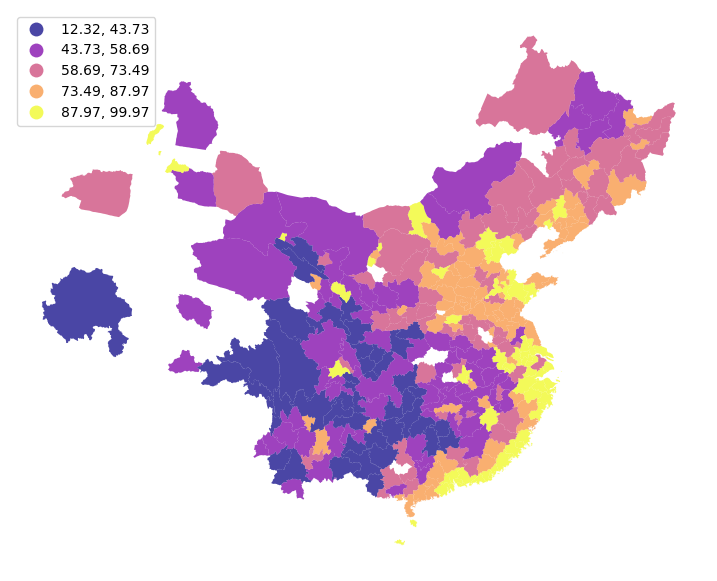

In [189]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
Data_ADM2China2023.plot(column="SDG711_pct",
        cmap='plasma',
        scheme='JenksCaspall',
        k=5,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

Nota: Se observan espacios vacíos en el mapa resultante, potencialmente, debido a los polígonos que no se lograron recuperar durante el *fuzzy merging*. La leyenda agrupa las divisiones administrativas a nivel de prefectura en 5 intervalos acorde al porcentaje de su población con acceso a la electricidad: 

**6.4. Crear un histograma con el mejor esquema obtenido en 6.2.: JenksCaspall**

Nuevamente, se empleará el esquema JenksCaspall con 5 intervalos (jc5).

<Axes: xlabel='SDG711_pct', ylabel='Count'>

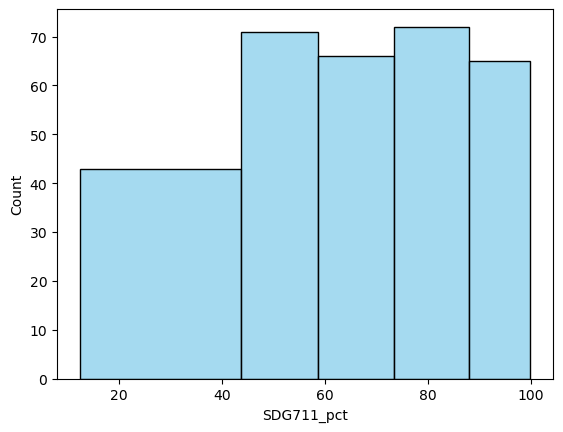

In [196]:
# Intervalos o "bins" del histograma
jc5_bins=list(jc5.bins)
jc5_bins.insert(0,Data_ADM2China2023.SDG711_pct.min())

#Histograma:
sea.histplot(Data_ADM2China2023.SDG711_pct, bins=jc5_bins,color='skyblue')

## Ejercicio 7

Compute the neighbors of the capital of your country. Plot the results for each of the options.

Capital de China: Beijing;Beijing (DM1_PROVINCE;ADM2_PREFECTURE)

In [219]:
Data_ADM2China2023[Data_ADM2China2023["ADM1_PROVINCE;ADM2_PREFECTURE"]=="Beijing;Beijing"]

,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg,SDG711_pct,SDG911_pct
226,CN011,CN011010,Beijing;Beijing,"POLYGON ((799198.389 2668810.613, 799685.802 2...",0.2956,99.022464,97.6631


**a) Vecinos Rook**

Beijing presenta 5 vecinos Rook, lo cuales son las prefecturas de Langfang, Tianjin, Zhangjiakou, Chengde y Baoding: 

In [228]:
from libpysal.weights import Queen, Rook, KNN

V_rook = Rook.from_dataframe(Data_ADM2China2023,use_index=False)
Data_ADM2China2023.iloc[V_rook.neighbors[226],]

D:\anaconda3\envs\Ciencia_De_Datos_Espaciales\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 8 islands with ids: 0, 1, 12, 13, 14, 90, 315, 316.
  warnings.warn(message)


,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg,SDG711_pct,SDG911_pct
224,CN013,CN013060,Hebei;Langfang,"MULTIPOLYGON (((751255.803 2597171.718, 752879...",0.2741,96.346386,97.481494
225,CN012,CN012010,Tianjin;Tianjin,"POLYGON ((822699.381 2668030.899, 825002.766 2...",0.2027,98.146525,97.606642
227,CN013,CN013110,Hebei;Zhangjiakou,"POLYGON ((572328.917 2897547.335, 574131.843 2...",0.2173,70.454956,94.936152
230,CN013,CN013030,Hebei;Chengde,"POLYGON ((963827.569 2806136.915, 964546.740 2...",0.3072,65.559806,77.126991
220,CN013,CN013010,Hebei;Baoding,"POLYGON ((701414.838 2586307.101, 695875.363 2...",0.3095,85.920686,92.480585


Gráfica de los vecinos Rook (rojo) a Beijing (azul):

<Axes: >

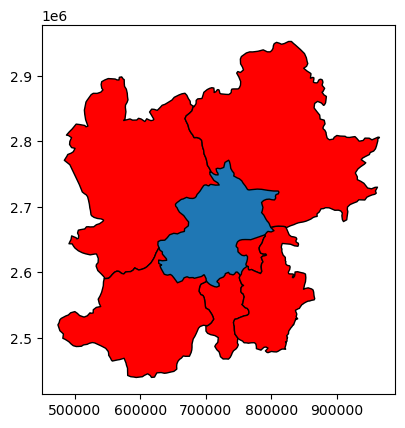

In [240]:
base = Data_ADM2China2023[Data_ADM2China2023["ADM1_PROVINCE;ADM2_PREFECTURE"]=="Beijing;Beijing"].plot()
Data_ADM2China2023.iloc[V_rook.neighbors[226],].plot(ax=base,facecolor="red",edgecolor='k')

**b) Vecinos Queen**

Beijing presenta 5 vecinos Queen, lo cuales son las prefecturas de Langfang, Tianjin, Zhangjiakou, Chengde y Baoding: 

In [242]:
V_queen = Queen.from_dataframe(Data_ADM2China2023,use_index=False)
Data_ADM2China2023.iloc[V_queen.neighbors[226],]

D:\anaconda3\envs\Ciencia_De_Datos_Espaciales\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 8 islands with ids: 0, 1, 12, 13, 14, 90, 315, 316.
  warnings.warn(message)


,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg,SDG711_pct,SDG911_pct
224,CN013,CN013060,Hebei;Langfang,"MULTIPOLYGON (((751255.803 2597171.718, 752879...",0.2741,96.346386,97.481494
225,CN012,CN012010,Tianjin;Tianjin,"POLYGON ((822699.381 2668030.899, 825002.766 2...",0.2027,98.146525,97.606642
227,CN013,CN013110,Hebei;Zhangjiakou,"POLYGON ((572328.917 2897547.335, 574131.843 2...",0.2173,70.454956,94.936152
230,CN013,CN013030,Hebei;Chengde,"POLYGON ((963827.569 2806136.915, 964546.740 2...",0.3072,65.559806,77.126991
220,CN013,CN013010,Hebei;Baoding,"POLYGON ((701414.838 2586307.101, 695875.363 2...",0.3095,85.920686,92.480585


Gráfica de los vecinos Queen (amarillo) a Beijing (azul):

<Axes: >

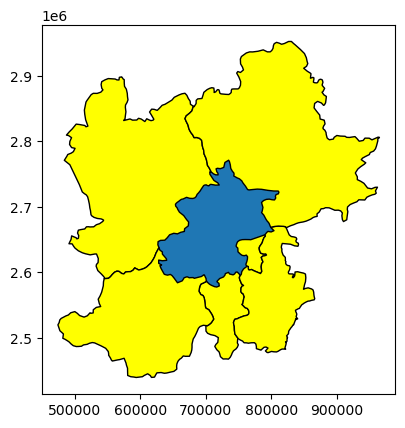

In [246]:
base = Data_ADM2China2023[Data_ADM2China2023["ADM1_PROVINCE;ADM2_PREFECTURE"]=="Beijing;Beijing"].plot()
Data_ADM2China2023.iloc[V_queen.neighbors[226],].plot(ax=base,facecolor="yellow",edgecolor='k')

**c) Vecinos knn**

Se han identificado los 6 (k=6) vecinos knn más cercanos a la prefectura de Beijing. Estos son las prefecturas de Langfang, Tianjin, Zhangjiakou, Chengde, Baoding y Tangshan.

In [258]:
V_knn = KNN.from_dataframe(Data_ADM2China2023, k=6)
Data_ADM2China2023.iloc[V_knn.neighbors[226],]

,ADM1_PCODE,ADM2_PCODE,ADM1_PROVINCE;ADM2_PREFECTURE,geometry,NDVI_avg,SDG711_pct,SDG911_pct
224,CN013,CN013060,Hebei;Langfang,"MULTIPOLYGON (((751255.803 2597171.718, 752879...",0.2741,96.346386,97.481494
225,CN012,CN012010,Tianjin;Tianjin,"POLYGON ((822699.381 2668030.899, 825002.766 2...",0.2027,98.146525,97.606642
227,CN013,CN013110,Hebei;Zhangjiakou,"POLYGON ((572328.917 2897547.335, 574131.843 2...",0.2173,70.454956,94.936152
230,CN013,CN013030,Hebei;Chengde,"POLYGON ((963827.569 2806136.915, 964546.740 2...",0.3072,65.559806,77.126991
220,CN013,CN013010,Hebei;Baoding,"POLYGON ((701414.838 2586307.101, 695875.363 2...",0.3095,85.920686,92.480585
228,CN013,CN013090,Hebei;Tangshan,"MULTIPOLYGON (((941180.254 2546400.820, 940792...",0.2645,88.550305,94.041041


Gráfica de los 6 vecinos knn (orange) a Beijing (azul):

<Axes: >

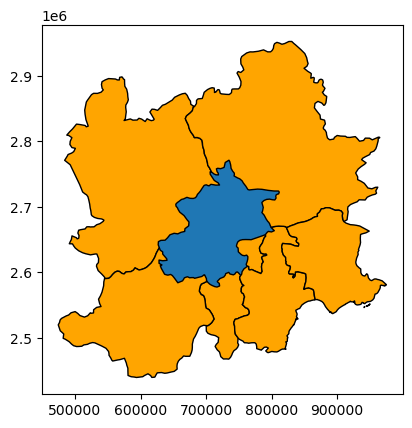

In [259]:
base = Data_ADM2China2023[Data_ADM2China2023["ADM1_PROVINCE;ADM2_PREFECTURE"]=="Beijing;Beijing"].plot()
Data_ADM2China2023.iloc[V_knn.neighbors[226],].plot(ax=base,facecolor="orange",edgecolor='k')

## Ejercicio 8

1. Compute the Moran's coefficient for **all** your numeric variables.
    
2. Make a scatter plot for each variable.

**a) Primera variable: SDG711_pct**

SDG711_pct alude al porcentaje de la población con acceso a la electricidad en subdivisiones administrativas a nivel de prefecturas (AMD2) en China y reportado el 2023.

a.1) Cálculo del coeficiente de Moran

In [291]:
from esda.moran import Moran

moranSDG711_pct = Moran(Data_ADM2China2023["SDG711_pct"], V_knn) 
moranSDG711_pct.I

0.5955720956011697

b.1) Gráfico de dispersión

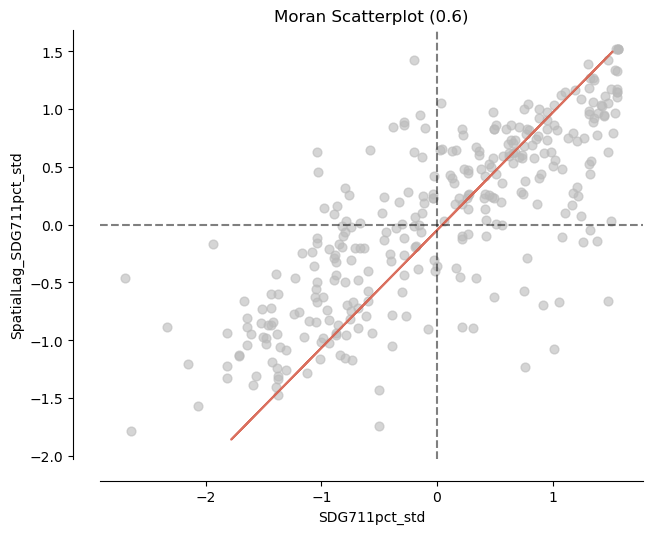

In [292]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranSDG711_pct, aspect_equal=True)
ax.set_xlabel('SDG711pct_std')
ax.set_ylabel('SpatialLag_SDG711pct_std');

**b) Segunda variable: SDG911_pct**

SDG911_pct es el índice de acceso rural, que representa el porcentaje de la población que vive al menos a 2 kilómetros de una carretera transitable.

b.1) Cálculo del coeficiente de Moran

In [293]:
moranSDG911_pct = Moran(Data_ADM2China2023["SDG911_pct"], V_knn) 
moranSDG911_pct.I

0.5384662180435552

b.2) Gráfico de dispersión

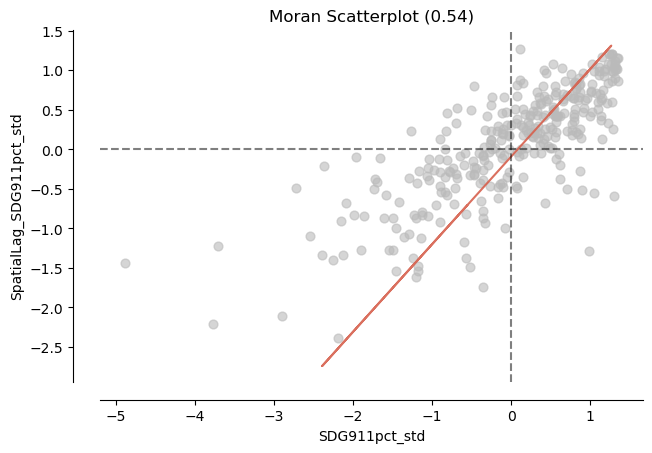

In [294]:
fig, ax = moran_scatterplot(moranSDG911_pct, aspect_equal=True)
ax.set_xlabel('SDG911pct_std')
ax.set_ylabel('SpatialLag_SDG911pct_std');

**c) Tercera variable: NDVI_avg**

NDVI_avg es el valor promedio del índice normalizado de diferencia de vegetación ("normalized difference vegetation index" o NDVI) y es una medida para cuantificar la densidad de vegetación en un área dada.

c.1) Cálculo del coeficiente de Moran

In [295]:
moranNDVI_avg = Moran(Data_ADM2China2023["NDVI_avg"], V_knn) 
moranNDVI_avg.I

0.8909349219259874

c.2) Gráfico de dispersión

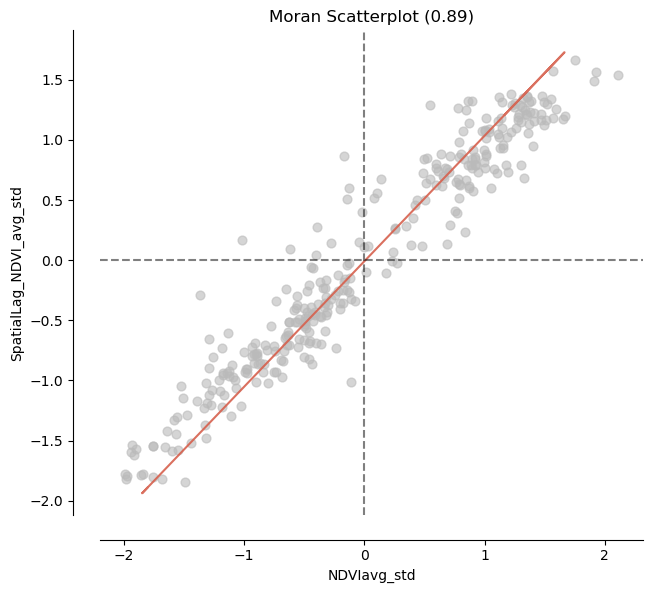

In [296]:
fig, ax = moran_scatterplot(moranNDVI_avg, aspect_equal=True)
ax.set_xlabel('NDVIavg_std')
ax.set_ylabel('SpatialLag_NDVI_avg_std');

Breve discusión: De las 3 variables analizadas, aquella que presentó un mayor coeficiente de Moran fue la tercera (NDVI_avg). Esto permite identificar que es aquella variable que presenta un correlación espacial más significante, en comparación con las otras dos. Esto último también se evidenció en que NDVI_avg presentó el gráfico de dispersión donde los puntos tendían a aglomerarse más entorno a la recta de la función identidad.

## Ejercicio 9
    
1. Compute the Local Moran for the variables in your data that have significant spatial correlation. 
2. Create a new column for each of those variables, with a label ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').
3. Prepare a map for each of the variables analyzed, showing the spots and outliers.

Nota: Si bien  NDVI_avg mostró la mayor significancia espacial, las otras dos también mostraron que presentaban cierto grado de correlación espacial. Por tanto, se computará Moran Local para las tres variables.

**a) Primera variable: SDG711_pct**

a.1) Moran local

In [319]:
from esda.moran import Moran_Local

lisaSDG711_pct= Moran_Local(Data_ADM2China2023["SDG711_pct"], w=V_knn,seed=2022)

a.2) Crear una columna con los rótulos ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

In [320]:
#valores no significativos: si p<0.05
Data_ADM2China2023["SDG711pct_quadrant"]=[l if p <0.05 else 0 for l, p in 
                                          zip(lisaSDG711_pct.q,lisaSDG711_pct.p_sim)] 

labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
Data_ADM2China2023["SDG711pct_quadrant_names"]=[labels[i] for i in 
                                                Data_ADM2China2023["SDG711pct_quadrant"]]

Data_ADM2China2023.drop(columns="SDG711pct_quadrant", inplace=True)

#Nueva columna: "SDG711pct_quadrant_names"
Data_ADM2China2023.SDG711pct_quadrant_names.head()

0        0 no_sig
1        0 no_sig
2        0 no_sig
3       1 hotSpot
4    4 hotOutlier
Name: SDG711pct_quadrant_names, dtype: object

a.3) Preparar un mapa, mostrandos spots y outliers.

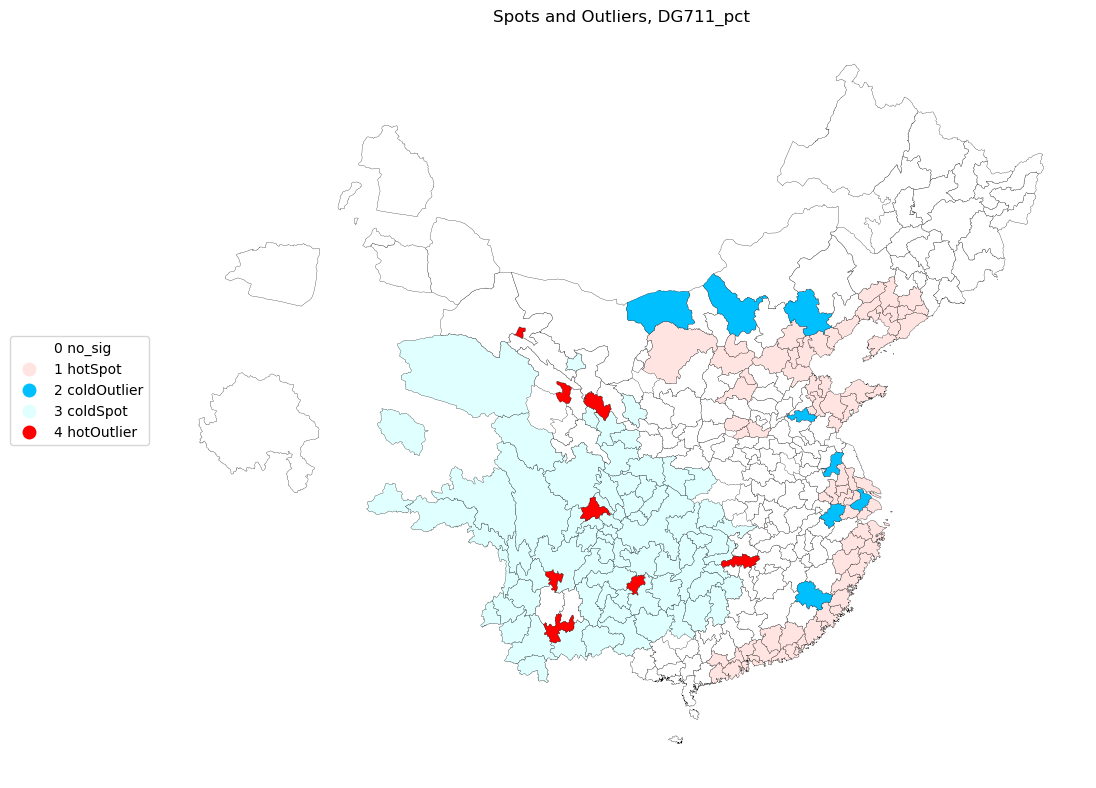

In [359]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'white', 'mistyrose', 'deepskyblue', 'lightcyan','red'])

f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers, DG711_pct')

Data_ADM2China2023.plot(column='SDG711pct_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.2,
                edgecolor='k',
                legend=True,
                legend_kwds={'bbox_to_anchor': (0, 0.6)},
                ax=ax)

ax.set_axis_off()
plt.show()

**b) Segunda variable: SDG911_pct**

b.1) Moran local

In [322]:
lisaSDG911_pct= Moran_Local(Data_ADM2China2023["SDG911_pct"], w=V_knn,seed=2022)

b.2) Crear una columna para cada variable con los rótulos ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

In [321]:
#valores no significativos: si p<0.05
Data_ADM2China2023["SDG911pct_quadrant"]=[l if p <0.05 else 0 for l, p in 
                                          zip(lisaSDG911_pct.q,lisaSDG911_pct.p_sim)] 

labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
Data_ADM2China2023["SDG911pct_quadrant_names"]=[labels[i] for i in 
                                                Data_ADM2China2023["SDG911pct_quadrant"]]

Data_ADM2China2023.drop(columns="SDG911pct_quadrant", inplace=True)

#Nueva columna: "SDG911pct_quadrant_names"
Data_ADM2China2023.SDG911pct_quadrant_names.head()

0        0 no_sig
1        0 no_sig
2        0 no_sig
3        0 no_sig
4    4 hotOutlier
Name: SDG911pct_quadrant_names, dtype: object

b.3) Preparar un mapa, mostrandos spots y outliers.

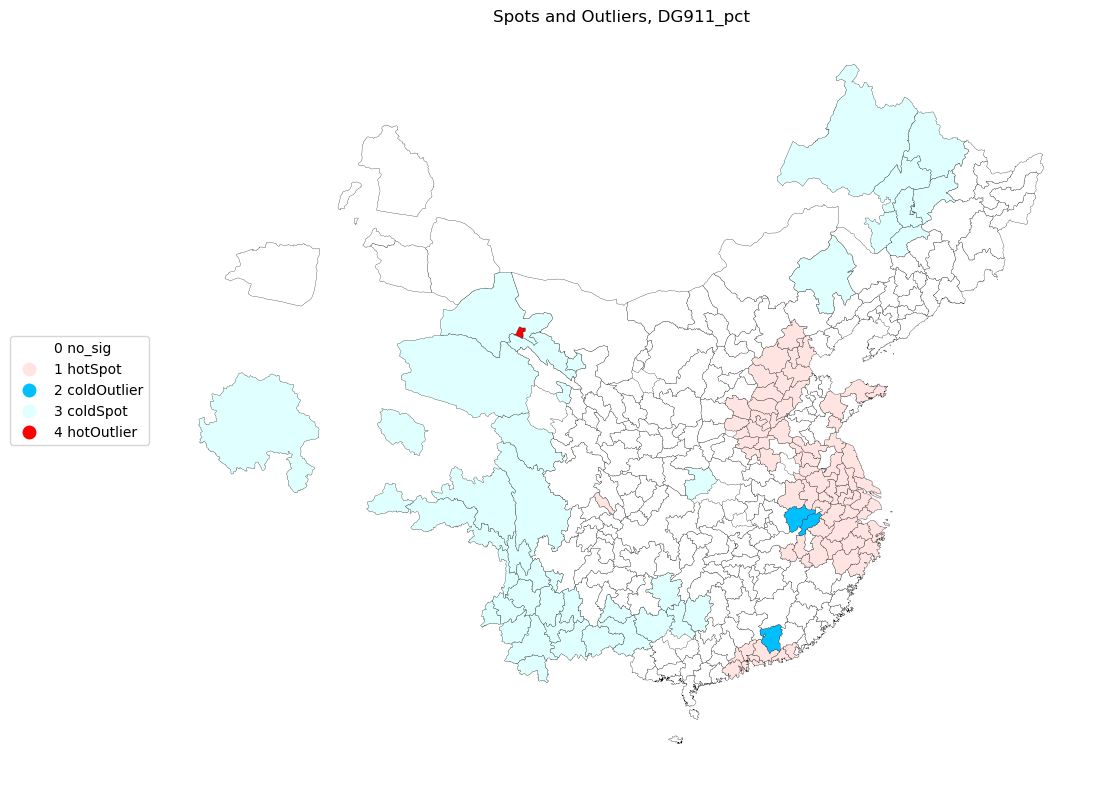

In [360]:
f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers, DG911_pct')

Data_ADM2China2023.plot(column='SDG911pct_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.2,
                edgecolor='k',
                legend=True,
                legend_kwds={'bbox_to_anchor': (0, 0.6)},
                ax=ax)

ax.set_axis_off()
plt.show()

**c) Tercera variable: NDVI_avg**

c.1) Moran local

In [286]:
lisaNDVI_avg= Moran_Local(Data_ADM2China2023["NDVI_avg"], w=V_knn,seed=2022)

c.2) Crear una columna para cada variable con los rótulos ('0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier').

In [361]:
#valores no significativos: si p<0.05
Data_ADM2China2023["NDVIavg_quadrant"]=[l if p <0.05 else 0 for l, p in 
                                          zip(lisaNDVI_avg.q,lisaNDVI_avg.p_sim)] 

labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']
Data_ADM2China2023["NDVIavg_quadrant_names"]=[labels[i] for i in 
                                                Data_ADM2China2023["NDVIavg_quadrant"]]

Data_ADM2China2023.drop(columns="NDVIavg_quadrant", inplace=True)

#Nueva columna: "NDVIavg_quadrant_names"
Data_ADM2China2023.NDVIavg_quadrant_names.head()

0    3 coldSpot
1    3 coldSpot
2    3 coldSpot
3      0 no_sig
4    3 coldSpot
Name: NDVIavg_quadrant_names, dtype: object

c.3) Preparar un mapa, mostrandos spots y outliers.

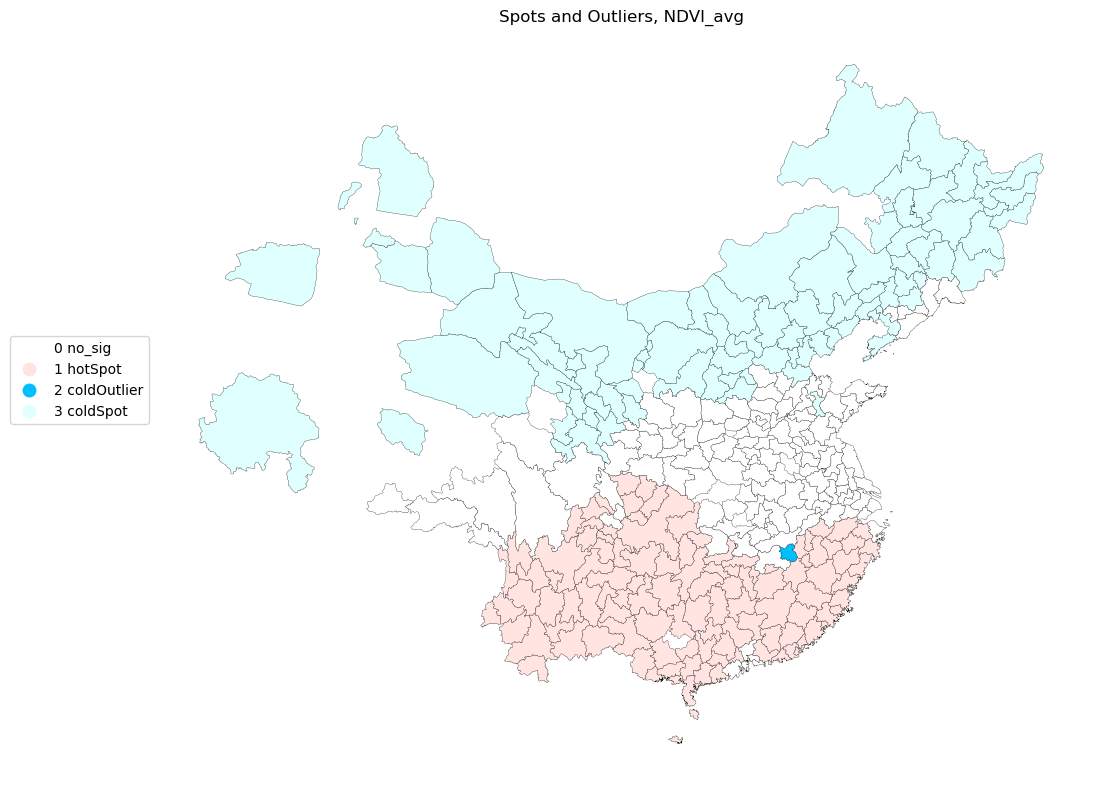

In [363]:
f, ax = plt.subplots(1, figsize=(12,12))

myColMap = colors.ListedColormap([ 'white', 'mistyrose', 'deepskyblue', 'lightcyan'])

plt.title('Spots and Outliers, NDVI_avg')

Data_ADM2China2023.plot(column='NDVIavg_quadrant_names',
                categorical=True,
                cmap=myColMap,
                linewidth=0.2,
                edgecolor='k',
                legend=True,
                legend_kwds={'bbox_to_anchor': (0, 0.6)},
                ax=ax)

ax.set_axis_off()
plt.show()